<a href="https://colab.research.google.com/github/shay2222/Arrays-two-dimensional-/blob/main/housing_price_prediction_based_on_size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear regression model of housing price**

**Project:**
Predicting House Prices

**Goal**
Build a linear regression model to predict house prices based on their size in square feet.

Libraries:

numpy: For numerical operations.

sklearn. linear_model: For linear regression model.

sklearn.model_selection: for splitting data into training and testing sets.

matplotlib.pyplot: For plotting the data and the regression line.


**Data Generated:**
A dataset of 100 houses with random sizes and prices.

**Reshape Data:**
Scikit-learn's *LinearRegression* expects the input features (size) to be a 2D array (a column vector). reshape(-1,1) converts the 1D array into a 2D array with one column.

**Split Data:**
The *train_test_split* function divides the data into training and testing sets. The training set is used to train the model and the testing set is used to evaluate its performance on unseen data.

**Create Model:** A *LinearRegression* object is created.

**Train Model:** The *fit()* method trains the model using the training data. It finds the best-fit line that minimizes the error between the predicted prices and the actual prices.

**Make Predictions:** The *predict()* method uses the trained model to predict the prices of the houses in the testing set.

**Evalute Model:** The *mean_squared_error* function calculates the average squared difference between the predicted prices and the actual prices. A lower MSE indicates better performance.

**Print Coefficiencts:** The *coef_* attribute contains the slope of the regression line, and the intercept_ attribute contains the y-intercept.

**Visualize:** The *matplotlib* code plots the actual data points and the regression line, allowing the visualization of the model performance.

Mean Squared Error: 34510776126.40133
Coefficient (Slope): [125.60087027]
Intercept: [159873.16082531]


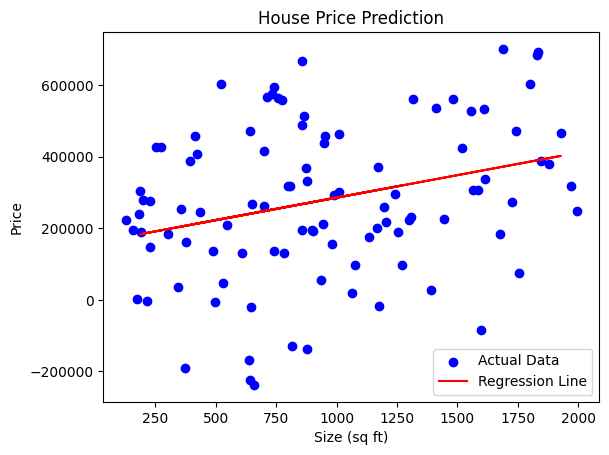

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  # Optional for visualization

# 1. Generate Sample Data (Replace with your actual data)
np.random.seed(0)  # for reproducibility
size = np.random.randint(100, 2000, 100)  # House sizes (100-2000 sq ft)
price = 200000 + 100 * size + np.random.normal(0, 200000, 100)  # Price with some noise

# 2. Reshape the data (Scikit-learn expects a 2D array)
size = size.reshape(-1, 1)  # Convert to a column vector
price = price.reshape(-1, 1)

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(size, price, test_size=0.2, random_state=42)  # 80% training, 20% testing

# 4. Create a Linear Regression model
model = LinearRegression()

# 5. Train the model
model.fit(X_train, y_train)

# 6. Make predictions on the test set
y_pred = model.predict(X_test)

# 7. Evaluate the model (Mean Squared Error)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# 8. Print the coefficients (slope and intercept)
print(f"Coefficient (Slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# 9. (Optional) Visualize the results
plt.scatter(size, price, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Size (sq ft)')
plt.ylabel('Price')
plt.title('House Price Prediction')
plt.legend()
plt.show()

Machine learning model for house price prediction based on the added features of size, age, bedrooms, bathrooms, and garage.  Output will use random forest regressor model.

   size  age  bedrooms  bathrooms  garage          price
0  1226   27         5          1       0  495175.062378
1  1559   19         5          1       0  501365.011454
2   960   47         1          3       0  540578.269190
3  1394   33         3          1       1  570923.491989
4  1230   40         2          3       0  581791.995626
Mean Squared Error: 1216671286.974483
R-squared: 0.9412481222394622

Feature Importances:
     feature  importance
1        age    0.880052
0       size    0.103583
2   bedrooms    0.008084
3  bathrooms    0.004372
4   garage_1    0.003909


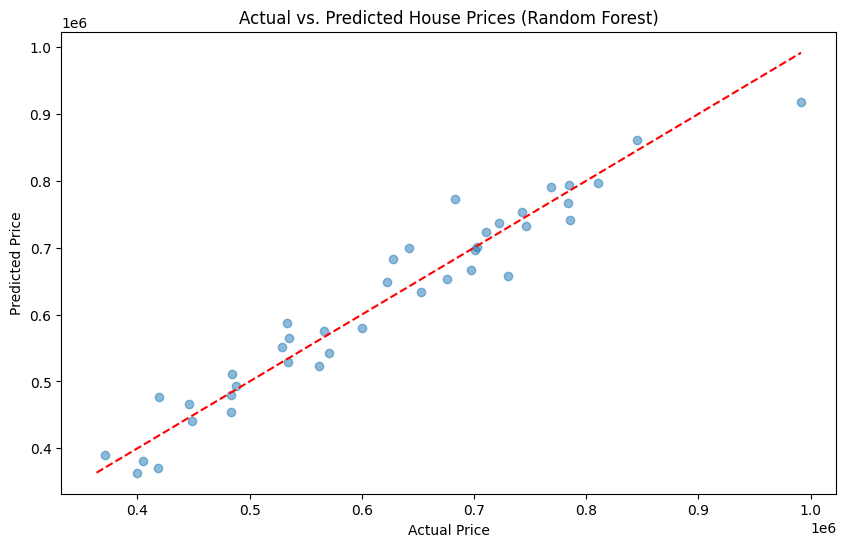

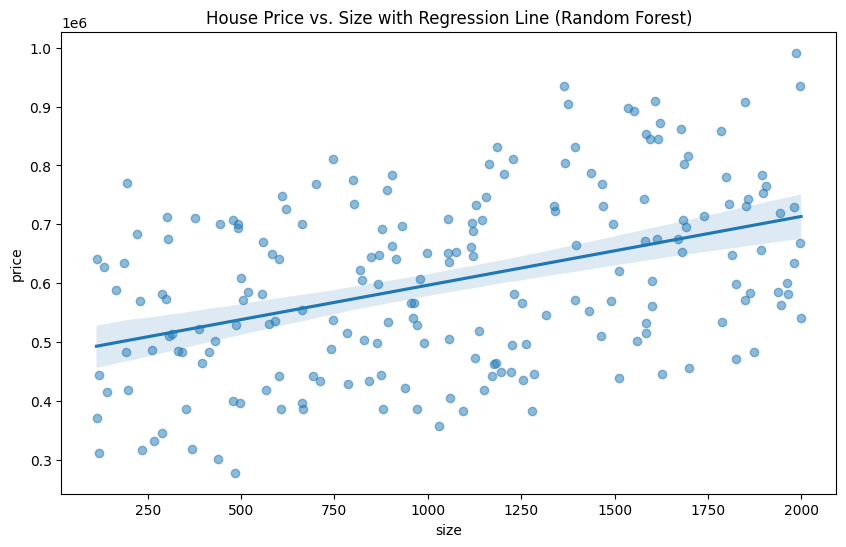


Predicted price for the new house: $539007.12


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Generation ( data loading from a CSV)
np.random.seed(42)  # For reproducibility

n_samples = 200
size = np.random.randint(100, 2000, n_samples)  # Square footage (100-2000 sq ft)
age = np.random.randint(5, 100, n_samples)  # Age of house (5-100 years)
bedrooms = np.random.randint(1, 6, n_samples)  # Number of bedrooms (1-5)
bathrooms = np.random.randint(1, 4, n_samples) # Number of bathrooms (1-3)
garage = np.random.randint(0, 2, n_samples)  # 0 (no garage), 1 (garage)


# Create some "realistic" price based on size, age, and other features.
# Introduce some noise to make it more realistic
price = (
    200000 +  # Base price
    100 * size +  # Size is most impactful
    5000 * age +  # Age negatively impacts price
    10000 * bedrooms +
    5000 * bathrooms +
    20000 * garage +
    np.random.normal(0, 20000, n_samples)  # Random noise
)
price = np.maximum(price, 200000) #Price shouldn't be negative.

# Create a Pandas DataFrame
data = pd.DataFrame({
    'size': size,
    'age': age,
    'bedrooms': bedrooms,
    'bathrooms': bathrooms,
    'garage': garage,
    'price': price
})

print(data.head())  # Display the first few rows


# 2. Feature Engineering & Data Preprocessing

# Convert categorical feature (garage) to numerical
# One-hot encoding is often appropriate for categorical features
data = pd.get_dummies(data, columns=['garage'], drop_first=True) #drop_first avoids multicollinearity.  'garage_1' represents having a garage

# Separate features (X) and target variable (y)
X = data.drop('price', axis=1)
y = data['price']

# 3. Split Data into Training and Testing Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 4. Model Selection and Training

# Choose a model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed

# Train the model
model.fit(X_train, y_train)

# 5. Make Predictions and Evaluate the Model

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# 6. (Optional) Feature Importance

feature_importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)
print("\nFeature Importances:")
print(importance_df)

# 7. (Optional) Scatter Plot with Regression Line

# Create a scatter plot of actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted House Prices (Random Forest)")

# Add a diagonal line for reference (perfect prediction)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.show()

# 8. (Optional)  Scatter Plot with Size as the x-axis and Regression Line

plt.figure(figsize=(10, 6))
sns.regplot(x="size", y="price", data=data, scatter_kws={'alpha':0.5})
plt.title("House Price vs. Size with Regression Line (Random Forest)")
plt.show()

# 9. (Optional) Make a Prediction for a New House

new_house = pd.DataFrame({
    'size': [2000],
    'age': [20],
    'bedrooms': [3],
    'bathrooms': [2],
    'garage_1': [1]  #Assuming garage represents the presence of a garage
})

# Make sure the new house data has the same columns as the training data
# and in the same order.  It's best practice
# to use the columns from X_train.

predicted_price = model.predict(new_house)[0]
print(f"\nPredicted price for the new house: ${predicted_price:.2f}")

**Import** *matplotlib.pyplot* and *seaborn*: These libraries are essential for creating plots.


**Scatter Plot (Actual vs. Predicted)**:

*plt.figure(figsize=(10, 6))*: Creates a figure with a specified size.

*plt.scatter(y_test, y_pred, alpha=0.5)*: Creates a scatter plot with actual prices on the x-axis and predicted prices on the y-axis. *alpha* controls the transparency of the points.

*plt.xlabel, plt.ylabel, plt.title* : Sets the labels and title of the plot.

*plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--'):* Adds a diagonal line (red dashed line) representing perfect prediction (where actual price equals predicted price). This helps visually assess how well the model is performing.

*plt.show():* Displays the plot.


**Scatter Plot with Size as x-axis**:

*sns.regplot(x="size", y="price", data=data, scatter_kws={'alpha':0.5})*: Uses Seaborn's *regplot* function to create a scatter plot of house price vs. size, with a regression line overlaid. *scatter_kws* allows you to customize the scatter plot points (e.g., transparency).

*plt.title*: Sets the title of the plot.

*plt.show()*: Displays the plot.

*Seaborn*: Seaborn is used for the second plot because it simplifies the creation of regression plots with a regression line.


**Import RandomForestRegressor**: Replaced LinearRegression with RandomForestRegressor from sklearn.ensemble.

**Model Initialization**: Created a RandomForestRegressor object with *n_estimators*=100 (number of trees in the forest) and random_state=42 for reproducibility. You can adjust n_estimators and other hyperparameters (e.g., max_depth, min_samples_leaf) to optimize the model's performance.

**Feature Importance**: Added code to calculate and print feature importances using *model.feature_importances_*. This shows which features are most influential in the model's predictions.

**Plot Titles**: Updated the plot titles to indicate that the plots are based on the Random Forest model.


Conclusion: The models created were built through machine learning to show prediction between house price and size. The size of houses that were used is between 100 to 2000 square feet.  The linear regression model show that as the size of the house increase, so does the price, but this s not always the case. The second model creates a Random Forest Regressor model, which provides more robust and accurate predictions when compare to a linear regression model. This model included more features like amount of bedrooms, amount of bathroom, age, and whether there is a garage or not. It show that the price of the house did not depend on size alone, but on different features that the house has.